## Lecture 18 - Numerical minimization methods

The primary package that we'll be using for numerical minimization is `scipy.optimize`. Specifically, the `minimize` and the `minimize_scalar` functions.

In [1]:
from scipy.optimize import minimize              # import scipy.optimize.minimize

# also import the other packages that we always use
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# print out the documentation of the minimize function
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized::

        fun(x, *args) -> float

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.

    Suppose the callable has signature ``f0(x, *my_args, **my_kwargs)``, where
    ``my_args`` and ``my_kwargs`` are required positional and keyword arguments.
    Rather than passing ``f0`` as the callable, wrap it to accept
    only ``x``; e.g., pass ``fun=lambda x: f0(x, *my_args, **my_kwargs)`` as the
    callable, where ``my_args`` (tuple) and ``my_kwargs`` (dict) have been
    gathered before invoking this function.
x0 : ndarray, shape (n,)
    Initial gu

This is a lot of inputs, so we're going to focus on the ones that we are actually important for us.
* `func` is the name of a function that you define prior to calling minimize
* `x0` is your initial guess for the value of your parameter(s) $\vec{x}$ that would minimize `func`
* `args` is the values of any inputs to `func` that are not variable'

### Minimizing functions in 1 dimension

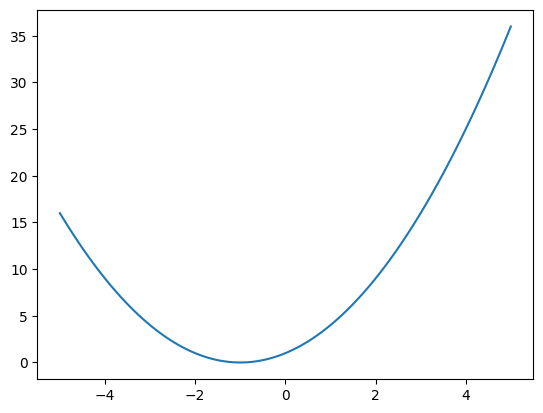

In [18]:
# First, let's define a simple 1D function
def func1_1D(x):
    '''
    Returns the value of the function x^2 + 2x + 1
    '''
    return x**2 + 2*x + 1

#test graph
x = np.linspace(-5, 5, 100)
y = func1_1D(x)
plt.plot(x, y)

This function has one "variable" `x` and no additional arguments. The first input to `minimize` is the function name (`func_1D`) and the second input is the initial guess `x0`. Here we'll guessuse an initial guess of `x0=0`

In [19]:
# most basic application of the minimize function
result_1 = minimize(func1_1D, x0 = 0)
print(result_1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [-1.000e+00]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


In [23]:
x1_min = result_1.x                            # the x value that minimizes the function is stored in the x attribute of the result object
func1_min = result_1.fun                       # the minimum value of the function is stored in the fun attribute of the result object
print(f'The minimum of this function is at x = {x1_min[0]:.2f}.')
print(f'The minimum value of the function is {func1_min:.2f}.')


The minimum of this function is at x = -1.00.
The minimum value of the function is 0.00.


*Note:* `results.x` is always going to be a list even if there is only one variable.

Text(0, 0.5, '$f(x)$')

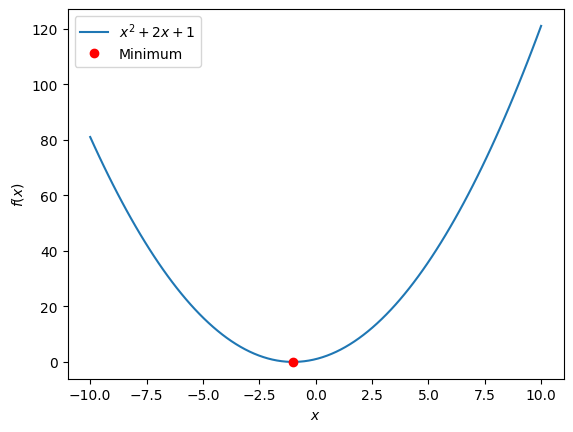

In [6]:
# Let's plot the function and the minimum
x1 = np.linspace(-10, 10, 100)
y1 = func1_1D(x1)
plt.plot(x1, y1, label='$x^2 + 2x + 1$')
plt.plot(x1_min, func1_min, 'o', color='red', label='Minimum')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Now what if we have a function with **multiple** inputs and we want to find the minimum with respect to only **one** of those inputs?

In [7]:
# define a slightly more complicated 1D function that takes addtional arguments
def func2_1D(x, a, b, c):
    '''
    Returns the value of a generic quadratic function ax^2 + bx + c
    '''
    return a*x**2 + b*x + c

We pass the initial guess for `x` to the `x0` parameter and our chosen values of `(a, b, c)` to `args`.

In [8]:
# most basic application of the minimize function
result_2 = minimize(func2_1D, x0 = 0, args=(1, 2, 1))               # this will also find the minimum of x^2 + 2x + 1
print(result_2)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [-1.000e+00]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


In [9]:
x2_min = result_2.x                      
func2_min = result_2.fun
print(f'The minimum of this function is at x = {x2_min[0]:.2f}.')
print(f'The minimum value of the function is {func2_min:.2f}.')

The minimum of this function is at x = -1.00.
The minimum value of the function is 0.00.


Text(0, 0.5, '$f(x)$')

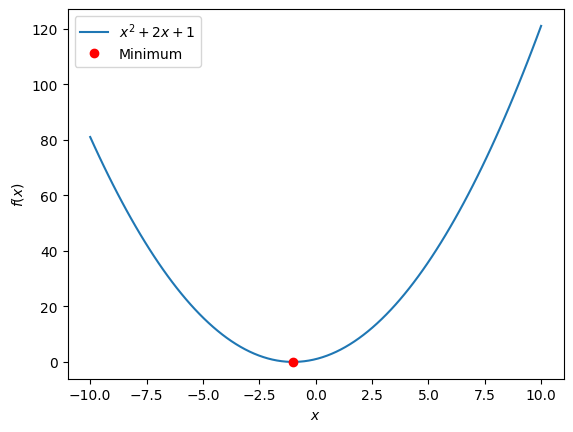

In [10]:
# Let's plot the function and the minimum
x2 = np.linspace(-10, 10, 100)
y2 = func1_1D(x2)
plt.plot(x2, y2, label='$x^2 + 2x + 1$')
plt.plot(x2_min, func2_min, 'o', color='red', label='Minimum')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

### Minimizing functions in 2+ dimensions

When you define a 2D function to use to minimize, you need to have you have both of your "variable" parameters in a single list or array. You can then "unpack" them from the list within the function as shown below.

In [11]:
# Define a very simple 2D function
def func3_2D(var):
    '''
    Input: array-like 
        var = [x, y] are the two variables were are trying to minimize over
    Returns the value of the function f(x, y) = x^2 + (y+2)^2 + 1
    '''
    x, y = var                             # unpack the variables
    return x**2 + (y+2)**2 + 1

Let's start with an initial guess of `[x, y] = [1, 1]`, which is going to be our `x0`: 

In [12]:
guess = np.array([1, 1])
result_3 = minimize(func3_2D, x0 = guess)
print(result_3)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0000000000000149
        x: [-1.028e-07 -2.000e+00]
      nit: 2
      jac: [-1.937e-07  1.341e-07]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 9
     njev: 3


In [13]:
vars3_min = result_3.x                         # the x and y value that minimizes the function is stored in the x attribute of the result object
func3_min = result_3.fun                       # the minimum value of the function is stored in the fun attribute of the result object

print(f'The minimum of this function is at x = {vars3_min[0]:.2f}, y = {vars3_min[1]:.2f}.')
print(f'The minimum value of the function is {func3_min:.2f}.')

The minimum of this function is at x = -0.00, y = -2.00.
The minimum value of the function is 1.00.


Text(0, 0.5, '$y$')

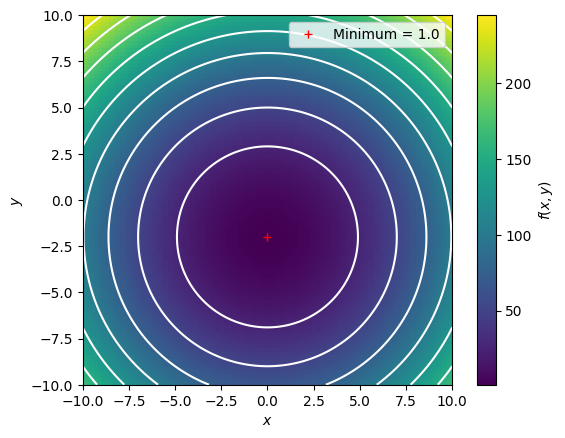

In [27]:
x3 = np.linspace(-10, 10, 100)
y3 = np.linspace(-10, 10, 100)
x_grid, y_grid = np.meshgrid(x3, y3)
z3 = func3_2D([x_grid, y_grid])
plt.imshow(z3, extent=[-10, 10, -10, 10], origin='lower', cmap='viridis')
plt.colorbar(label='$f(x, y)$')
plt.contour(x_grid, y_grid, z3, colors='white', levels=10)
plt.plot(vars3_min[0], vars3_min[1], '+', color='red', label=f'Minimum = {func3_min:.1f}')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

### Exercise: 

1. Define a function that calculates $$f(x, y) = \left(\frac{x}{a}\right)^2 + \left(\frac{y}{b}\right)^2 + c.$$ $x$ and $y$ will be our variable parameters and $a$ and $b$ will be fixed parameters.

In [ ]:
def func(var, a, b, c):
    '''
    Input: 
    var: array-like 
        [x, y] are the two variables were are trying to minimize over
    a: float
        a fixed value of the function
    b: float
        a fixed value of the function
    c: float
        a fixed value of the function
    Returns the value of the function f(x, y) = (x/a)^2 + (y/b)^2
    '''
    x, y = var                             # unpack the variables
    return (x/a)**2 + (y/b)**2 + 4

2. Find the values of $x, y$ that minimizes this function when $a = 2$, $b = 0.5$ and $c=3$

In [29]:
guess = [0,0]   #initial guess for the minimum
result = minimize(func, x0 = guess, args=(2, 0.5, 4))   #this will the minimum of f(x,y) = (x/2)^2 + (2y)^2 + 4

# print out the result here 
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 3.725e-09  5.960e-08]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1


In [ ]:
vars_min = result.x
func_min = result.fun

x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
x_grid, y_grid = np.meshgrid(x, y)
z = func([x_grid, y_grid], 2, 0.5, 3)
plt.imshow(z3, extent=[-20, 20, -20, 20], origin='lower', cmap='magma')
plt.colorbar(label='$f(x, y)$')
plt.contour(x_grid, y_grid, z, colors='white', levels=20)
plt.plot(vars_min[0], vars_min[1], '+', color='cyan', label=f'Minimum = {func_min:.1f}')
plt.legend(facecolor='black', labelcolor='white')
plt.xlabel('$x$')
plt.ylabel('$y$')